[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [1]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


NameError: name 'pickle' is not defined

(Optional) Load a second model if you want to do comparative testing

In [ ]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [ ]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

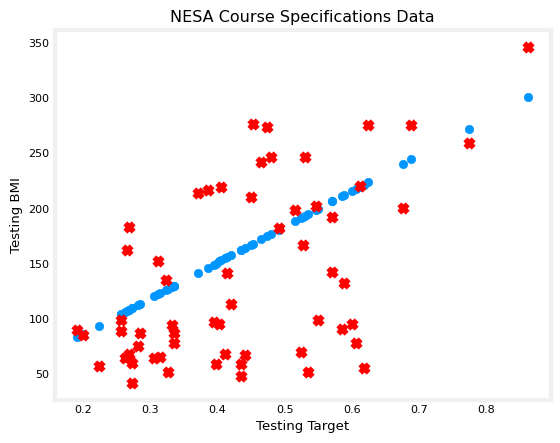

In [ ]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [ ]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.18394314438568704


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [ ]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

         DoB    DoT  Predicted result    Loss
0   0.267647   68.0        107.885240  -39.89
1   0.547059  202.0        198.440808    3.56
2   0.600000   95.0        215.598705 -120.60
3   0.273529   42.0        109.791673  -67.79
4   0.267647  183.0        107.885240   75.11
5   0.435294   59.0        162.218581 -103.22
6   0.570588  192.0        206.066540  -14.07
7   0.402941   95.0        151.733200  -56.73
8   0.397059   59.0        149.826767  -90.83
9   0.370588  214.0        141.247818   72.75
10  0.385294  216.0        146.013901   69.99
11  0.535294   52.0        194.627942 -142.63
12  0.570588  142.0        206.066540  -64.07
13  0.861765  346.0        300.434974   45.57
14  0.611765  220.0        219.411571    0.59
15  0.255882   89.0        104.072374  -15.07
16  0.479412  246.0        176.516829   69.48
17  0.623529  275.0        223.224437   51.78
18  0.491176  182.0        180.329695    1.67
19  0.323529  135.0        125.996354    9.00
20  0.273529   60.0        109.791

You may want to do some manual predictions to understand your model.

In [ ]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[53.5518998]
[345.23614982]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [ ]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: 21.14253868758587
Coefficient: [324.09361114]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [ ]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [ ]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [ ]:
mx_col = ['BMI','BP','FDR']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

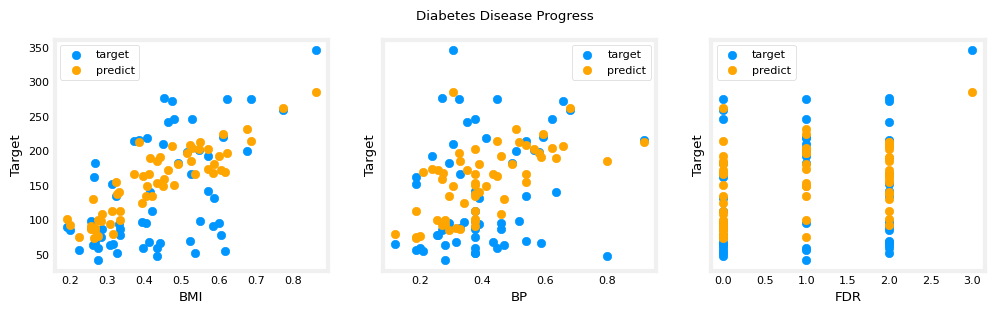

In [ ]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [ ]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.2720804543963655


In [ ]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[21.22178168]
[316.73828094]


In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

         BMI        BP  FDR  Target  Predicted result    Cost
0   0.267647  0.317647  0.0    68.0         88.246713  -20.25
1   0.547059  0.564706  1.0   202.0        203.212128   -1.21
2   0.600000  0.458824  0.0    95.0        192.137471  -97.14
3   0.273529  0.282353  1.0    42.0         99.574702  -57.57
4   0.267647  0.294118  0.0   183.0         85.678807   97.32
5   0.435294  0.376471  1.0    59.0        152.913429  -93.91
6   0.570588  0.239176  1.0   192.0        173.949460   18.05
7   0.402941  0.294118  1.0    95.0        135.312338  -40.31
8   0.397059  0.447059  2.0    59.0        164.051419 -105.05
9   0.370588  0.541176  2.0   214.0        167.275697   46.72
10  0.385294  0.917647  2.0   216.0        212.277378    3.72
11  0.535294  0.376471  0.0    52.0        165.922959 -113.92
12  0.570588  0.376471  2.0   142.0        202.546960  -60.55
13  0.861765  0.305882  3.0   346.0        285.977803   60.02
14  0.611765  0.596118  1.0   220.0        223.867124   -3.87
15  0.25

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -17.676495327363767
Coefficient: [266.23301146 109.13598753  13.61377104]


#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.